In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import CMR_IA as cmr
from matplotlib.lines import Line2D
from scipy.stats import norm

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 16
SAVEFIG = True

## Load Stimuli and Semantic Matrix

In [2]:
with open("simu1_data/simu1_design.pkl", "rb") as inp:
    df = pickle.load(inp)
# df = df.loc[df.session < 300]  # for testing
df

,subject_ID,position,item,itemno,category_label,lag,old,session,study_itemno1,study_itemno2,test_itemno1,test_itemno2
0,64,0,ERASER,96,OfficeSupplies,0,False,0,96,-1,96,-1
1,64,1,PEN,196,OfficeSupplies,0,False,0,196,-1,196,-1
2,64,2,PENCIL,197,OfficeSupplies,0,False,0,197,-1,197,-1
3,64,3,VAN,285,Vehicles,0,False,0,285,-1,285,-1
4,64,4,LETTUCE,153,Vegetables,0,False,0,153,-1,153,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
579995,335,575,PAPER,190,OfficeSupplies,0,False,999,190,-1,190,-1
579996,335,576,FORK,110,KitchenTools,0,False,999,110,-1,110,-1
579997,335,577,NOTEBOOK,177,OfficeSupplies,0,False,999,177,-1,177,-1
579998,335,578,DOLLHOUSE,81,Toys,0,False,999,81,-1,81,-1


In [3]:
s_mat = np.load("simu1_data/simu1_300_smat.npy")

## Run CMR-IA

In [4]:
# define parameters
params = cmr.make_default_params()
params.update(
    beta_enc=0.05,
    beta_rec_post=0.01,
    s_fc=0.12,
    gamma_fc=0.05,
    c_thresh_itm=0.605,
    use_new_context=True,
)
params

{'beta_enc': 0.05,
 'beta_rec': 0.5,
 'beta_cue': 0.5,
 'beta_rec_post': 0.01,
 'beta_distract': None,
 'phi_s': 2,
 'phi_d': 0.5,
 's_cf': 0,
 's_fc': 0.12,
 'kappa': 0.5,
 'eta': 0.5,
 'omega': 5,
 'alpha': 1,
 'c_thresh': 0.5,
 'c_thresh_itm': 0.605,
 'c_thresh_ass': 0.5,
 'd_ass': 1,
 'lamb': 0.5,
 'rec_time_limit': 60000.0,
 'dt': 10,
 'nitems_in_accumulator': 50,
 'max_recalls': 50,
 'learn_while_retrieving': False,
 'a': 2800,
 'b': 20,
 'm': 0,
 'n': 1,
 'c1': 0,
 'thresh_sigma': 0,
 'No_recall': None,
 'var_enc': 1,
 'bad_enc_ratio': 1,
 'gamma_fc': 0.05,
 'gamma_cf': 0.5,
 'use_new_context': True}

In [5]:
# run the model
df_simu = cmr.run_conti_recog_multi_sess(params, df, s_mat, mode="Continuous")

100%|██████████| 1000/1000 [10:09<00:00,  1.64it/s]

CMR Time: 609.5595829486847


In [6]:
# merge to get more info
df_simu = df_simu.merge(df, on=["session", "position", "study_itemno1", "study_itemno2", "test_itemno1", "test_itemno2"])
df_simu

,session,position,study_itemno1,study_itemno2,test_itemno1,test_itemno2,s_resp,s_rt,csim,subject_ID,item,itemno,category_label,lag,old
0,0,0,96,-1,96,-1,0.0,0.015567,0.000000,64,ERASER,96,OfficeSupplies,0,False
1,0,1,196,-1,196,-1,0.0,0.023094,0.019722,64,PEN,196,OfficeSupplies,0,False
2,0,2,197,-1,197,-1,0.0,0.036365,0.042424,64,PENCIL,197,OfficeSupplies,0,False
3,0,3,285,-1,285,-1,0.0,0.038379,0.045119,64,VAN,285,Vehicles,0,False
4,0,4,153,-1,153,-1,0.0,0.058194,0.065933,64,LETTUCE,153,Vegetables,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579995,999,575,190,-1,190,-1,0.0,1476.427490,0.573000,335,PAPER,190,OfficeSupplies,0,False
579996,999,576,110,-1,110,-1,0.0,1669.963623,0.579159,335,FORK,110,KitchenTools,0,False
579997,999,577,177,-1,177,-1,0.0,1571.338257,0.576115,335,NOTEBOOK,177,OfficeSupplies,0,False
579998,999,578,81,-1,81,-1,0.0,926.585144,0.549707,335,DOLLHOUSE,81,Toys,0,False


In [7]:
df_simu.to_pickle("simu1_data/simu1_result.pkl")

## Analysis

### Preprocesssing

In [8]:
with open("simu1_data/simu1_result.pkl", "rb") as inp:
    df_simu = pickle.load(inp)

In [9]:
# calculate the rolling category length
rolling_window = 9
category_label_dummies = df_simu["category_label"].str.get_dummies()
category_label_dummies.columns = ["cl_" + col for col in category_label_dummies.columns]
category_label_dummies_events = pd.concat([df_simu, category_label_dummies], axis=1)  # record the occurrence of every cat label
cl_rolling_sum = (
    category_label_dummies_events.groupby("session").rolling(rolling_window, min_periods=1, on="position")[category_label_dummies.columns].sum().reset_index()
)
df_rollcat = df_simu.merge(cl_rolling_sum, on=["session", "position"])
df_simu["roll_cat_label_length"] = df_rollcat.apply(lambda x: x["cl_" + x["category_label"]], axis=1)  # how many cat within 9 window
df_simu["roll_cat_label_length"] = df_simu["roll_cat_label_length"] - 1  # how many cat in previous 8 window, not include self

# add rolling category length level
df_simu["roll_cat_len_level"] = pd.cut(x=df_simu.roll_cat_label_length, bins=[0, 2, np.inf], right=False, include_lowest=True, labels=["0-1", ">=2"]).astype(
    "str"
)
df_simu

,session,position,study_itemno1,study_itemno2,test_itemno1,test_itemno2,s_resp,s_rt,csim,subject_ID,item,itemno,category_label,lag,old,roll_cat_label_length,roll_cat_len_level
0,0,0,96,-1,96,-1,0.0,0.015567,0.000000,64,ERASER,96,OfficeSupplies,0,False,0.0,0-1
1,0,1,196,-1,196,-1,0.0,0.023094,0.019722,64,PEN,196,OfficeSupplies,0,False,1.0,0-1
2,0,2,197,-1,197,-1,0.0,0.036365,0.042424,64,PENCIL,197,OfficeSupplies,0,False,2.0,>=2
3,0,3,285,-1,285,-1,0.0,0.038379,0.045119,64,VAN,285,Vehicles,0,False,0.0,0-1
4,0,4,153,-1,153,-1,0.0,0.058194,0.065933,64,LETTUCE,153,Vegetables,0,False,0.0,0-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579995,999,575,190,-1,190,-1,0.0,1476.427490,0.573000,335,PAPER,190,OfficeSupplies,0,False,4.0,>=2
579996,999,576,110,-1,110,-1,0.0,1669.963623,0.579159,335,FORK,110,KitchenTools,0,False,0.0,0-1
579997,999,577,177,-1,177,-1,0.0,1571.338257,0.576115,335,NOTEBOOK,177,OfficeSupplies,0,False,5.0,>=2
579998,999,578,81,-1,81,-1,0.0,926.585144,0.549707,335,DOLLHOUSE,81,Toys,0,False,0.0,0-1


In [10]:
# add log and log lag bin
df_simu["log_lag"] = np.log(df_simu["lag"])
df_simu["log_lag_bin"] = pd.cut(df_simu["log_lag"], np.arange(df_simu["log_lag"].max() + 1), labels=False, right=False)
df_simu

/Users/bei/anaconda3/envs/cmr/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,session,position,study_itemno1,study_itemno2,test_itemno1,test_itemno2,s_resp,s_rt,csim,subject_ID,item,itemno,category_label,lag,old,roll_cat_label_length,roll_cat_len_level,log_lag,log_lag_bin
0,0,0,96,-1,96,-1,0.0,0.015567,0.000000,64,ERASER,96,OfficeSupplies,0,False,0.0,0-1,-inf,NaN
1,0,1,196,-1,196,-1,0.0,0.023094,0.019722,64,PEN,196,OfficeSupplies,0,False,1.0,0-1,-inf,NaN
2,0,2,197,-1,197,-1,0.0,0.036365,0.042424,64,PENCIL,197,OfficeSupplies,0,False,2.0,>=2,-inf,NaN
3,0,3,285,-1,285,-1,0.0,0.038379,0.045119,64,VAN,285,Vehicles,0,False,0.0,0-1,-inf,NaN
4,0,4,153,-1,153,-1,0.0,0.058194,0.065933,64,LETTUCE,153,Vegetables,0,False,0.0,0-1,-inf,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579995,999,575,190,-1,190,-1,0.0,1476.427490,0.573000,335,PAPER,190,OfficeSupplies,0,False,4.0,>=2,-inf,NaN
579996,999,576,110,-1,110,-1,0.0,1669.963623,0.579159,335,FORK,110,KitchenTools,0,False,0.0,0-1,-inf,NaN
579997,999,577,177,-1,177,-1,0.0,1571.338257,0.576115,335,NOTEBOOK,177,OfficeSupplies,0,False,5.0,>=2,-inf,NaN
579998,999,578,81,-1,81,-1,0.0,926.585144,0.549707,335,DOLLHOUSE,81,Toys,0,False,0.0,0-1,-inf,NaN


In [11]:
# construct local FAR
old_vec = df_simu.old.to_numpy()
log_lag_bin_vec = df_simu.log_lag_bin.to_numpy()
position_vec = df_simu.position.to_numpy()
max_position = np.max(position_vec)
log_lag_bin_newpre_lst = []
log_lag_bin_newpost_lst = []
for i in range(len(df_simu)):
    if position_vec[i] > 0:
        if old_vec[i] == False and old_vec[i - 1] == True:
            log_lag_bin_newpre_lst.append(log_lag_bin_vec[i - 1])
        else:
            log_lag_bin_newpre_lst.append("N")
    else:
        log_lag_bin_newpre_lst.append("N")

    if position_vec[i] < max_position:
        if old_vec[i] == False and old_vec[i + 1] == True:
            log_lag_bin_newpost_lst.append(log_lag_bin_vec[i + 1])
        else:
            log_lag_bin_newpost_lst.append("N")
    else:
        log_lag_bin_newpost_lst.append("N")

df_simu["log_lag_bin_newpre"] = log_lag_bin_newpre_lst
df_simu["log_lag_bin_newpost"] = log_lag_bin_newpost_lst
df_simu

,session,position,study_itemno1,study_itemno2,test_itemno1,test_itemno2,s_resp,s_rt,csim,subject_ID,...,itemno,category_label,lag,old,roll_cat_label_length,roll_cat_len_level,log_lag,log_lag_bin,log_lag_bin_newpre,log_lag_bin_newpost
0,0,0,96,-1,96,-1,0.0,0.015567,0.000000,64,...,96,OfficeSupplies,0,False,0.0,0-1,-inf,NaN,N,N
1,0,1,196,-1,196,-1,0.0,0.023094,0.019722,64,...,196,OfficeSupplies,0,False,1.0,0-1,-inf,NaN,N,N
2,0,2,197,-1,197,-1,0.0,0.036365,0.042424,64,...,197,OfficeSupplies,0,False,2.0,>=2,-inf,NaN,N,N
3,0,3,285,-1,285,-1,0.0,0.038379,0.045119,64,...,285,Vehicles,0,False,0.0,0-1,-inf,NaN,N,N
4,0,4,153,-1,153,-1,0.0,0.058194,0.065933,64,...,153,Vegetables,0,False,0.0,0-1,-inf,NaN,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579995,999,575,190,-1,190,-1,0.0,1476.427490,0.573000,335,...,190,OfficeSupplies,0,False,4.0,>=2,-inf,NaN,N,N
579996,999,576,110,-1,110,-1,0.0,1669.963623,0.579159,335,...,110,KitchenTools,0,False,0.0,0-1,-inf,NaN,N,N
579997,999,577,177,-1,177,-1,0.0,1571.338257,0.576115,335,...,177,OfficeSupplies,0,False,5.0,>=2,-inf,NaN,N,N
579998,999,578,81,-1,81,-1,0.0,926.585144,0.549707,335,...,81,Toys,0,False,0.0,0-1,-inf,NaN,N,N


In [12]:
df_simu["log_lag_bin"] = df_simu.apply(lambda x: 0 if x["log_lag_bin"] == 1 else x["log_lag_bin"], axis=1)
df_simu["log_lag_bin"] = df_simu.apply(lambda x: 5 if x["log_lag_bin"] > 5 else x["log_lag_bin"], axis=1)
df_simu["log_lag_bin_newpre"] = df_simu.apply(lambda x: 0 if x["log_lag_bin_newpre"] == 1 else x["log_lag_bin_newpre"], axis=1)
df_simu["log_lag_bin_newpost"] = df_simu.apply(lambda x: 0 if x["log_lag_bin_newpost"] == 1 else x["log_lag_bin_newpost"], axis=1)
# distribute items into bins
log_lag_bins = [0, 2, 3, 4, 5]
for bin in log_lag_bins:
    col_name = "log_lag_bin_" + str(bin)
    df_simu[col_name] = (df_simu.log_lag_bin == bin) | (df_simu.log_lag_bin_newpre == bin) | (df_simu.log_lag_bin_newpost == bin)
df_simu

,session,position,study_itemno1,study_itemno2,test_itemno1,test_itemno2,s_resp,s_rt,csim,subject_ID,...,roll_cat_len_level,log_lag,log_lag_bin,log_lag_bin_newpre,log_lag_bin_newpost,log_lag_bin_0,log_lag_bin_2,log_lag_bin_3,log_lag_bin_4,log_lag_bin_5
0,0,0,96,-1,96,-1,0.0,0.015567,0.000000,64,...,0-1,-inf,NaN,N,N,False,False,False,False,False
1,0,1,196,-1,196,-1,0.0,0.023094,0.019722,64,...,0-1,-inf,NaN,N,N,False,False,False,False,False
2,0,2,197,-1,197,-1,0.0,0.036365,0.042424,64,...,>=2,-inf,NaN,N,N,False,False,False,False,False
3,0,3,285,-1,285,-1,0.0,0.038379,0.045119,64,...,0-1,-inf,NaN,N,N,False,False,False,False,False
4,0,4,153,-1,153,-1,0.0,0.058194,0.065933,64,...,0-1,-inf,NaN,N,N,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579995,999,575,190,-1,190,-1,0.0,1476.427490,0.573000,335,...,>=2,-inf,NaN,N,N,False,False,False,False,False
579996,999,576,110,-1,110,-1,0.0,1669.963623,0.579159,335,...,0-1,-inf,NaN,N,N,False,False,False,False,False
579997,999,577,177,-1,177,-1,0.0,1571.338257,0.576115,335,...,>=2,-inf,NaN,N,N,False,False,False,False,False
579998,999,578,81,-1,81,-1,0.0,926.585144,0.549707,335,...,0-1,-inf,NaN,N,N,False,False,False,False,False


In [13]:
df_simu.groupby(["old", "log_lag_bin", "roll_cat_len_level"]).s_resp.count()

old   log_lag_bin  roll_cat_len_level
True  0.0          0-1                   19274
                   >=2                   38012
      2.0          0-1                   46831
                   >=2                   18057
      3.0          0-1                   76266
                   >=2                    8666
      4.0          0-1                   56599
                   >=2                    3465
      5.0          0-1                   12283
                   >=2                     547
Name: s_resp, dtype: int64

### Recency & Similarity

In [14]:
df_lst = []
for bin in log_lag_bins:
    col_name = "log_lag_bin_" + str(bin)
    df_tmp = df_simu.query(col_name + " == True").groupby(["session", "old", "roll_cat_len_level"])["s_resp"].agg(["mean", "sum", "count"]).reset_index()
    df_tmp["log_lag_bin"] = bin
    df_lst.append(df_tmp)
df_rollcat_laggp = pd.concat(df_lst)
df_rollcat_laggp.rename(columns={"mean": "yes_rate"}, inplace=True)
df_rollcat_laggp["yes_rate_adj"] = (df_rollcat_laggp["sum"] + 0.5) / (df_rollcat_laggp["count"] + 1)
df_rollcat_laggp

,session,old,roll_cat_len_level,yes_rate,sum,count,log_lag_bin,yes_rate_adj
0,0,False,0-1,0.200000,6.0,30,0,0.209677
1,0,False,>=2,0.300000,6.0,20,0,0.309524
2,0,True,0-1,0.789474,15.0,19,0,0.775000
3,0,True,>=2,0.764706,26.0,34,0,0.757143
4,1,False,0-1,0.121212,8.0,66,0,0.126866
...,...,...,...,...,...,...,...,...
2632,997,False,>=2,0.200000,2.0,10,5,0.227273
2633,997,True,0-1,0.658537,27.0,41,5,0.654762
2634,997,True,>=2,0.000000,0.0,1,5,0.250000
2635,998,False,>=2,1.000000,1.0,1,5,0.750000


In [15]:
# log lag for display
df_rollcat_laggp["log_lag_disp"] = np.ceil(np.e**df_rollcat_laggp.log_lag_bin)
df_rollcat_laggp

,session,old,roll_cat_len_level,yes_rate,sum,count,log_lag_bin,yes_rate_adj,log_lag_disp
0,0,False,0-1,0.200000,6.0,30,0,0.209677,1.0
1,0,False,>=2,0.300000,6.0,20,0,0.309524,1.0
2,0,True,0-1,0.789474,15.0,19,0,0.775000,1.0
3,0,True,>=2,0.764706,26.0,34,0,0.757143,1.0
4,1,False,0-1,0.121212,8.0,66,0,0.126866,1.0
...,...,...,...,...,...,...,...,...,...
2632,997,False,>=2,0.200000,2.0,10,5,0.227273,149.0
2633,997,True,0-1,0.658537,27.0,41,5,0.654762,149.0
2634,997,True,>=2,0.000000,0.0,1,5,0.250000,149.0
2635,998,False,>=2,1.000000,1.0,1,5,0.750000,149.0


In [16]:
# pivot for hr and far
df_rollcat_laggp["old"] = df_rollcat_laggp["old"].astype("str")
df_dprime = pd.pivot_table(
    df_rollcat_laggp, values=["yes_rate", "yes_rate_adj"], index=["session", "roll_cat_len_level", "log_lag_disp"], columns="old"
).reset_index()
df_dprime.columns = [" ".join(col).strip() for col in df_dprime.columns.values]
df_dprime = df_dprime.rename(columns={"yes_rate False": "far", "yes_rate True": "hr", "yes_rate_adj False": "far_adj", "yes_rate_adj True": "hr_adj"})
df_dprime

,session,roll_cat_len_level,log_lag_disp,far,hr,far_adj,hr_adj
0,0,0-1,1.0,0.200000,0.789474,0.209677,0.775000
1,0,0-1,8.0,0.319149,0.700000,0.322917,0.696078
2,0,0-1,21.0,0.180328,0.560440,0.185484,0.559783
3,0,0-1,55.0,0.230769,0.511111,0.240741,0.510870
4,0,0-1,149.0,0.000000,0.333333,0.166667,0.375000
...,...,...,...,...,...,...,...
9566,999,0-1,55.0,0.428571,0.655172,0.431818,0.650000
9567,999,>=2,1.0,0.224490,0.816092,0.230000,0.812500
9568,999,>=2,8.0,0.105263,0.850000,0.125000,0.833333
9569,999,>=2,21.0,0.166667,0.500000,0.184211,0.500000


In [17]:
# calculate dprime
df_dprime["z_hr"] = norm.ppf(df_dprime["hr_adj"])
df_dprime["z_far"] = norm.ppf(df_dprime["far_adj"])
df_dprime["dprime"] = df_dprime["z_hr"] - df_dprime["z_far"]
df_dprime

,session,roll_cat_len_level,log_lag_disp,far,hr,far_adj,hr_adj,z_hr,z_far,dprime
0,0,0-1,1.0,0.200000,0.789474,0.209677,0.775000,0.755415,-0.807541,1.562956
1,0,0-1,8.0,0.319149,0.700000,0.322917,0.696078,0.513155,-0.459558,0.972713
2,0,0-1,21.0,0.180328,0.560440,0.185484,0.559783,0.150418,-0.894662,1.045080
3,0,0-1,55.0,0.230769,0.511111,0.240741,0.510870,0.027249,-0.703922,0.731171
4,0,0-1,149.0,0.000000,0.333333,0.166667,0.375000,-0.318639,-0.967422,0.648782
...,...,...,...,...,...,...,...,...,...,...
9566,999,0-1,55.0,0.428571,0.655172,0.431818,0.650000,0.385320,-0.171747,0.557068
9567,999,>=2,1.0,0.224490,0.816092,0.230000,0.812500,0.887147,-0.738847,1.625993
9568,999,>=2,8.0,0.105263,0.850000,0.125000,0.833333,0.967422,-1.150349,2.117771
9569,999,>=2,21.0,0.166667,0.500000,0.184211,0.500000,0.000000,-0.899435,0.899435


#### HR

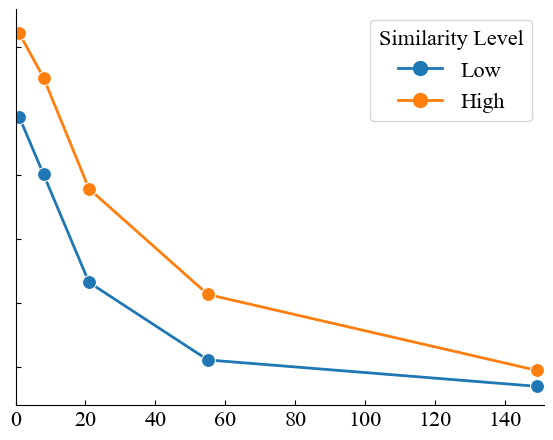

In [18]:
fig, ax = plt.subplots(figsize=(6, 4.5))
fig.subplots_adjust(left=0.1, right=0.98, bottom=0.1, top=0.98)

ax.spines[["right", "top"]].set_visible(False)
ax.tick_params(axis="y", direction="in")
ax.tick_params(axis="x", direction="in")
sns.lineplot(data=df_dprime, y="hr", x="log_lag_disp", hue="roll_cat_len_level", marker="o", markersize=10, linestyle="-", lw=2, ax=ax, errorbar=None)
plt.ylabel('P("Yes" | Old)')
plt.xlabel("Lag")
# selected_lag = np.array([1,np.e,np.e**2,np.e**3,np.e**4,np.e**5])
# plt.xticks(ticks=selected_lag, labels = ['1','e','e2','e3','e4','e5'])
plt.xticks(ticks=np.arange(0, 160, 20))
plt.ylim([0.47, 0.78])
plt.xlim([0, 151])
legend_elements = [
    Line2D([0], [0], color=sns.color_palette()[0], lw=2, marker="o", markersize=10, linestyle="-", label="Low"),
    Line2D([0], [0], color=sns.color_palette()[1], lw=2, marker="o", markersize=10, linestyle="-", label="High"),
]
plt.legend(handles=legend_elements, title="Similarity Level")

if SAVEFIG:
    ax.set(xlabel=None, ylabel=None)
    plt.tick_params(labelleft=False)
    plt.savefig(f"simu1_fig/simu1_hr.pdf")

#### FAR

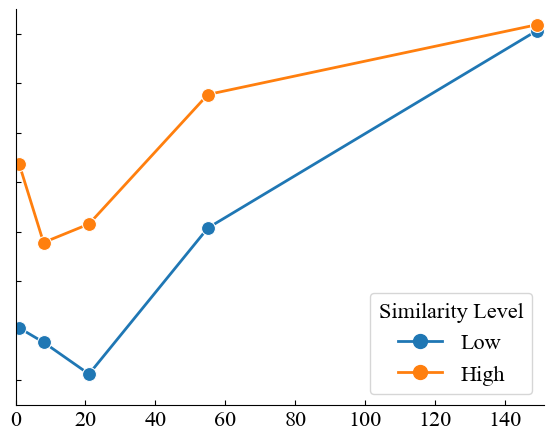

In [19]:
fig, ax = plt.subplots(figsize=(6, 4.5))
fig.subplots_adjust(left=0.1, right=0.98, bottom=0.1, top=0.98)

ax.spines[["right", "top"]].set_visible(False)
ax.tick_params(axis="y", direction="in")
ax.tick_params(axis="x", direction="in")
sns.lineplot(data=df_dprime, y="far", x="log_lag_disp", hue="roll_cat_len_level", marker="o", markersize=10, linestyle="-", lw=2, ax=ax, errorbar=None)
plt.ylabel('P("Yes" | New)')
plt.xlabel("Lag")
# selected_lag = np.array([1,np.e,np.e**2,np.e**3,np.e**4,np.e**5])
# plt.xticks(ticks=selected_lag, labels = ['1','e','e2','e3','e4','e5'])
# plt.yticks(ticks=np.arange(0.14, 0.28, 0.02))
plt.xticks(ticks=np.arange(0, 160, 20))
plt.ylim([0.19, 0.35])
plt.xlim([0, 151])
legend_elements = [
    Line2D([0], [0], color=sns.color_palette()[0], lw=2, marker="o", markersize=10, linestyle="-", label="Low"),
    Line2D([0], [0], color=sns.color_palette()[1], lw=2, marker="o", markersize=10, linestyle="-", label="High"),
]
plt.legend(handles=legend_elements, title="Similarity Level", loc="lower right")

if SAVEFIG:
    ax.set(xlabel=None, ylabel=None)
    plt.tick_params(labelleft=False)
    plt.savefig(f"simu1_fig/simu1_far.pdf")

#### d prime

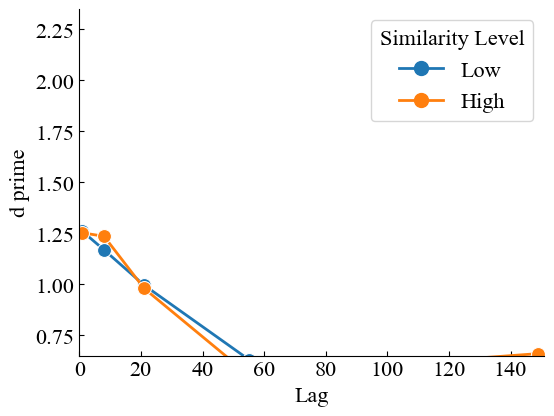

In [20]:
fig, ax = plt.subplots(figsize=(6, 4.5))
# fig.subplots_adjust(left=0.1, right=0.98, bottom=0.1, top=0.98)

ax.spines[["right", "top"]].set_visible(False)
ax.tick_params(axis="y", direction="in")
ax.tick_params(axis="x", direction="in")
sns.lineplot(data=df_dprime, y="dprime", x="log_lag_disp", hue="roll_cat_len_level", marker="o", markersize=10, linestyle="-", lw=2, ax=ax, errorbar=None)
plt.ylabel("d prime")
plt.xlabel("Lag")
# selected_lag = np.array([1,np.e,np.e**2,np.e**3,np.e**4,np.e**5])
# plt.xticks(ticks=selected_lag, labels = ['1','e','e2','e3','e4','e5'])
plt.xticks(ticks=np.arange(0, 160, 20))
plt.ylim([0.65, 2.35])
plt.xlim([0, 151])
legend_elements = [
    Line2D([0], [0], color=sns.color_palette()[0], lw=2, marker="o", markersize=10, linestyle="-", label="Low"),
    Line2D([0], [0], color=sns.color_palette()[1], lw=2, marker="o", markersize=10, linestyle="-", label="High"),
]
plt.legend(handles=legend_elements, title="Similarity Level")

# if SAVEFIG:
#     ax.set(xlabel=None, ylabel=None)
#     plt.tick_params(labelleft=False)
#     plt.savefig(f"simu1_fig/simu1_dprime.pdf")

In [21]:
df_hrfar = df_dprime.groupby(["roll_cat_len_level", "log_lag_disp"])[["hr", "far"]].mean().reset_index()
hr_lowsim = df_hrfar.query('roll_cat_len_level == "0-1"').hr.to_numpy()
hr_highsim = df_hrfar.query('roll_cat_len_level == ">=2"').hr.to_numpy()
far_lowsim = df_hrfar.query('roll_cat_len_level == "0-1"').far.to_numpy()
far_highsim = df_hrfar.query('roll_cat_len_level == ">=2"').far.to_numpy()
hr_lowsim, hr_highsim, far_lowsim, far_highsim

(array([0.69593922, 0.65067154, 0.56607939, 0.50538336, 0.48473664]),
 array([0.76136202, 0.7263281 , 0.63936861, 0.55662015, 0.49726295]),
 array([0.22123431, 0.2153999 , 0.20255539, 0.2615828 , 0.34123772]),
 array([0.28754334, 0.25570874, 0.26318848, 0.31550574, 0.34368214]))

In [22]:
hr_lowsim_gt = np.array([0.885, 0.853, 0.787, 0.682, 0.630])
hr_highsim_gt = np.array([0.893, 0.858, 0.795, 0.720, 0.671])
far_lowsim_gt = np.array([0.190, 0.190, 0.190, 0.195, 0.212])
far_highsim_gt = np.array([0.202, 0.210, 0.216, 0.229, 0.237])  # a bit diff from real gt
pow_err = (
    np.mean(np.power(hr_lowsim - hr_lowsim_gt, 2))
    + np.mean(np.power(hr_highsim - hr_highsim_gt, 2))
    + np.mean(np.power(far_lowsim - far_lowsim_gt, 2))
    + np.mean(np.power(far_highsim - far_highsim_gt, 2))
)
abs_err = (
    np.mean(np.abs(hr_lowsim - hr_lowsim_gt))
    + np.mean(np.abs(hr_highsim - hr_highsim_gt))
    + np.mean(np.abs(far_lowsim - far_lowsim_gt))
    + np.mean(np.abs(far_highsim - far_highsim_gt))
)
err = pow_err + abs_err / 10
err

0.11592940250410852

### Az

In [23]:
def calculate_Az(df_tmp1):
    log_lag_bins = [0, 2, 3, 4, 5]
    Azs = []
    for bin in log_lag_bins:

        # get the df of this log_lag_bin
        col_name = "log_lag_bin_" + str(bin)
        df_tmp = df_tmp1.query(col_name + " == True").copy()

        # get variables
        conf = df_tmp.csim.to_numpy()
        truth = df_tmp.old.to_numpy()
        old_num = np.sum(truth)
        new_num = np.sum(~truth)
        is_old = truth
        is_new = ~truth

        if np.sum(truth) == 0 or np.sum(~truth) == 0:
            Azs.append(np.nan)
            continue

        # calculate hr and far for different thresholds
        min_thresh = 0.37
        max_thresh = 0.67
        thresholds = np.linspace(min_thresh, max_thresh, 7)
        hrs = []
        fars = []
        old_conf = conf * is_old
        new_conf = conf * is_new
        for thresh in thresholds:
            hr = (np.sum(old_conf > thresh) + 0.5) / (old_num + 1)
            far = (np.sum(new_conf > thresh) + 0.5) / (new_num + 1)
            hrs.append(hr)
            fars.append(far)

        # calculate z_hr and z_far
        z_hr = norm.ppf(hrs)
        z_far = norm.ppf(fars)

        try:
            # linear regression on z_hr and z_far manually
            n = len(z_far)
            X = np.column_stack((np.ones(n), z_far))
            beta = np.linalg.inv(X.T @ X) @ X.T @ z_hr
            intercept, slope = beta
        except:
            print("fail")
            Azs.append(np.nan)

        # get A_z
        Az = norm.cdf(intercept / np.sqrt(1 + slope**2))
        Azs.append(Az)

    # df to return
    df_return = pd.DataFrame({"log_lag_bin": log_lag_bins, "Az": Azs})

    return df_return

In [24]:
df_Az = df_simu.groupby(["session", "roll_cat_len_level"]).apply(calculate_Az).reset_index()
df_Az.drop(columns="level_2", inplace=True)
df_Az["log_lag_disp"] = np.ceil(np.e**df_Az.log_lag_bin)
df_Az

/var/folders/js/fb9kwys10ln8jgq1bxxqg0tr0000gn/T/ipykernel_54639/3630102506.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_Az = df_simu.groupby(["session", "roll_cat_len_level"]).apply(calculate_Az).reset_index()


,session,roll_cat_len_level,log_lag_bin,Az,log_lag_disp
0,0,0-1,0,0.768057,1.0
1,0,0-1,2,0.700356,8.0
2,0,0-1,3,0.692412,21.0
3,0,0-1,4,0.605708,55.0
4,0,0-1,5,0.689486,149.0
...,...,...,...,...,...
9995,999,>=2,0,0.831193,1.0
9996,999,>=2,2,0.792869,8.0
9997,999,>=2,3,0.626465,21.0
9998,999,>=2,4,NaN,55.0


In [25]:
# pickup those rows where Az is Nan in df_Az
df_Az.loc[df_Az.Az.isna()]

,session,roll_cat_len_level,log_lag_bin,Az,log_lag_disp
9,0,>=2,5,NaN,149.0
14,1,0-1,5,NaN,149.0
19,1,>=2,5,NaN,149.0
29,2,>=2,5,NaN,149.0
49,4,>=2,5,NaN,149.0
...,...,...,...,...,...
9984,998,0-1,5,NaN,149.0
9989,998,>=2,5,NaN,149.0
9994,999,0-1,5,NaN,149.0
9998,999,>=2,4,NaN,55.0


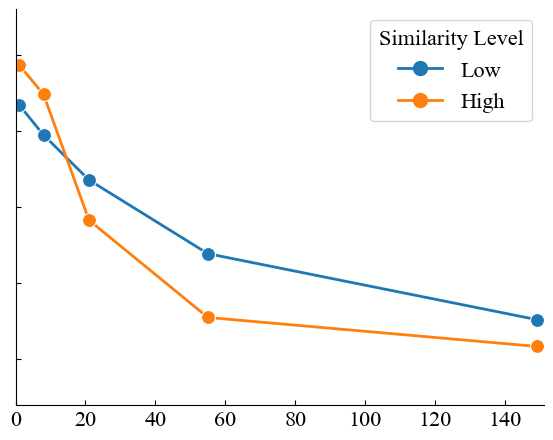

In [26]:
fig, ax = plt.subplots(figsize=(6, 4.5))
fig.subplots_adjust(left=0.1, right=0.98, bottom=0.1, top=0.98)

ax.spines[["right", "top"]].set_visible(False)
ax.tick_params(axis="y", direction="in")
ax.tick_params(axis="x", direction="in")
sns.lineplot(data=df_Az, y="Az", x="log_lag_disp", hue="roll_cat_len_level", marker="o", markersize=10, linestyle="-", lw=2, ax=ax, errorbar=None)
plt.ylabel("$A_z$")
plt.xlabel("Lag")
# selected_lag = np.array([1,np.e,np.e**2,np.e**3,np.e**4,np.e**5])
# plt.xticks(ticks=selected_lag, labels = ['1','e','e2','e3','e4','e5'])
plt.xticks(ticks=np.arange(0, 160, 20))
plt.ylim([0.52, 0.78])
plt.xlim([0, 151])
legend_elements = [
    Line2D([0], [0], color=sns.color_palette()[0], lw=2, marker="o", markersize=10, linestyle="-", label="Low"),
    Line2D([0], [0], color=sns.color_palette()[1], lw=2, marker="o", markersize=10, linestyle="-", label="High"),
]
plt.legend(handles=legend_elements, title="Similarity Level")

if SAVEFIG:
    ax.set(xlabel=None, ylabel=None)
    plt.tick_params(labelleft=False)
    plt.savefig(f"simu1_fig/simu1_Az.pdf")

In [27]:
df_plot = df_Az.groupby(["roll_cat_len_level", "log_lag_bin"]).Az.mean().to_frame(name="Az").reset_index()
Az_lowsim = df_plot.query("roll_cat_len_level == '0-1'").Az.to_numpy()
Az_highsim = df_plot.query("roll_cat_len_level == '>=2'").Az.to_numpy()
Az_lowsim, Az_highsim

(array([0.7171604 , 0.69738943, 0.66782695, 0.61946243, 0.57617102]),
 array([0.74348087, 0.7239871 , 0.64144075, 0.57757704, 0.55855757]))

In [28]:
# ground truth
Az_lowsim_gt = np.array([0.79422725, 0.80266184, 0.78106113, 0.71072426, 0.63727226])
Az_highsim_gt = np.array([0.78978756, 0.77160788, 0.73594832, 0.66568966, 0.62507146])

# calculate the error
err = np.mean(np.power(Az_lowsim - Az_lowsim_gt, 2)) + np.mean(np.power(Az_highsim - Az_highsim_gt, 2))
err

0.01348746109056352

### CSIM Analysis

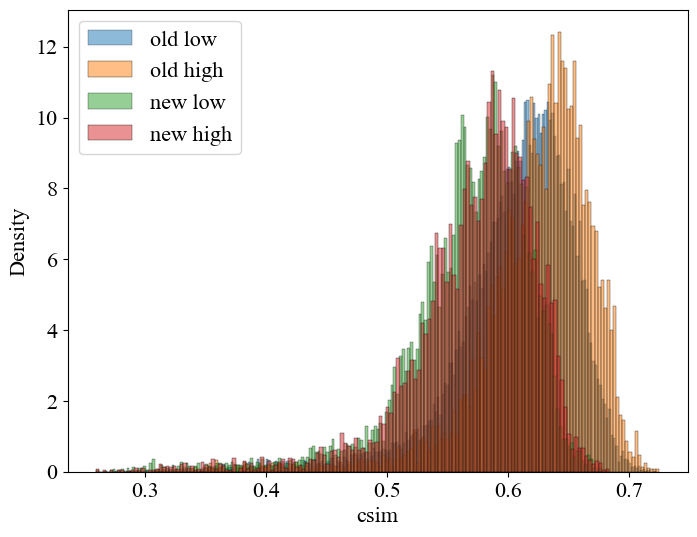

In [29]:
df_csim = df_simu.query("log_lag_bin_0 == True or log_lag_bin_2 == True or log_lag_bin_3 == True or log_lag_bin_4 == True or log_lag_bin_5 == True")

# plot histogram of csim, group by roll_cat_len_level and old
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.histplot(df_csim.query("old == True and roll_cat_len_level == '0-1'"), x="csim", alpha=0.5, ax=ax, stat="density", label="old low")
sns.histplot(df_csim.query("old == True and roll_cat_len_level == '>=2'"), x="csim", alpha=0.5, ax=ax, stat="density", label="old high")
sns.histplot(df_csim.query("old == False and roll_cat_len_level == '0-1'"), x="csim", alpha=0.5, ax=ax, stat="density", label="new low")
sns.histplot(df_csim.query("old == False and roll_cat_len_level == '>=2'"), x="csim", alpha=0.5, ax=ax, stat="density", label="new high")
plt.legend()
plt.show()

In [30]:
tmp_lst = [0, 2, 3, 4, 5]
for i in tmp_lst:
    print(i)
    print(df_csim.query(f"log_lag_bin_{i} == True").groupby(["old", "roll_cat_len_level"]).csim.agg(["mean", "std"]).round(3))

0
                           mean    std
old   roll_cat_len_level              
False 0-1                 0.566  0.055
      >=2                 0.573  0.053
True  0-1                 0.621  0.052
      >=2                 0.628  0.050
2
                           mean    std
old   roll_cat_len_level              
False 0-1                 0.558  0.066
      >=2                 0.565  0.064
True  0-1                 0.606  0.067
      >=2                 0.624  0.052
3
                           mean    std
old   roll_cat_len_level              
False 0-1                 0.565  0.050
      >=2                 0.572  0.050
True  0-1                 0.603  0.051
      >=2                 0.611  0.049
4
                           mean    std
old   roll_cat_len_level              
False 0-1                 0.578  0.038
      >=2                 0.583  0.041
True  0-1                 0.604  0.038
      >=2                 0.609  0.037
5
                           mean    std
old   roll_cat_

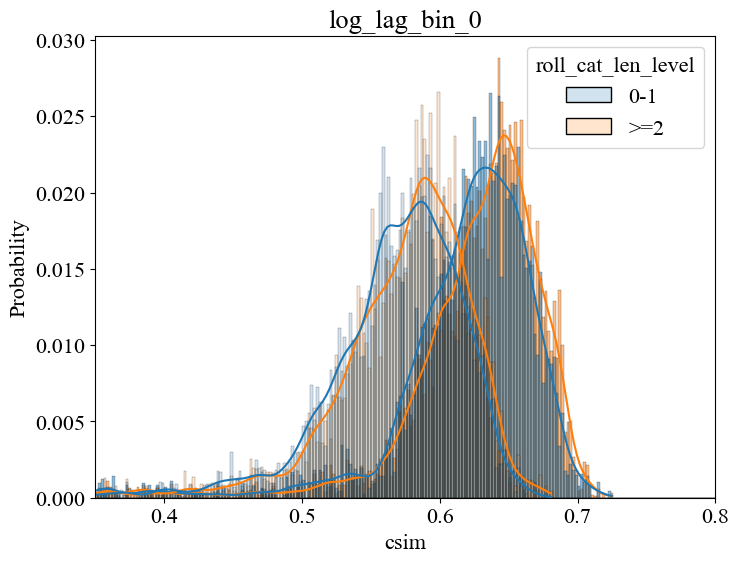

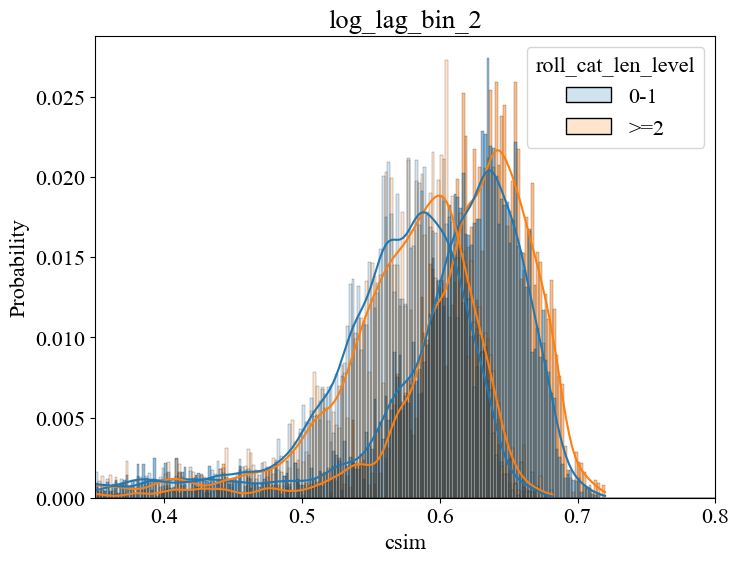

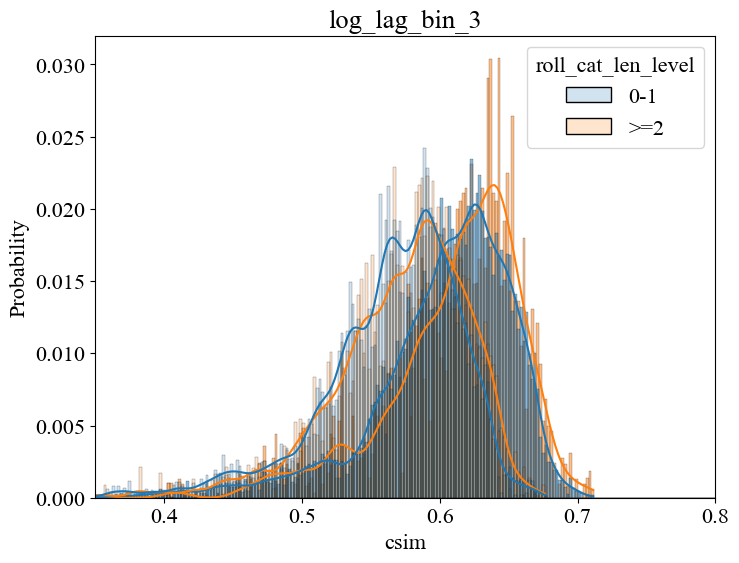

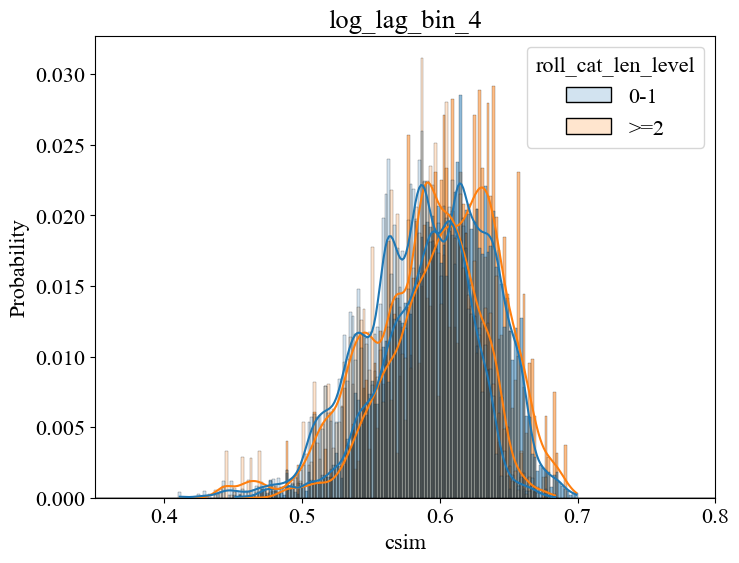

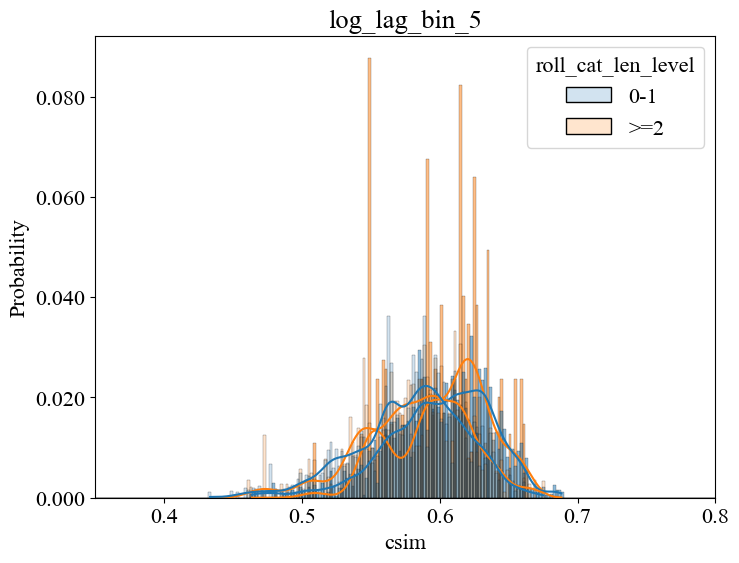

In [31]:
from matplotlib.ticker import FormatStrFormatter

for i in tmp_lst:
    plt.subplots(figsize=(8, 6))
    sns.histplot(
        df_csim.query(f"log_lag_bin_{i} == True and old == True"),
        x="csim",
        hue="roll_cat_len_level",
        hue_order=["0-1", ">=2"],
        # binwidth=0.002,
        bins=np.arange(0.3, 0.84, 0.002),
        alpha=0.5,
        stat="probability",
        common_norm=False,
        kde=True,
    )

    sns.histplot(
        df_csim.query(f"log_lag_bin_{i} == True and old == False"),
        x="csim",
        hue="roll_cat_len_level",
        hue_order=["0-1", ">=2"],
        # binwidth=0.002,
        bins=np.arange(0.3, 0.84, 0.002),
        alpha=0.2,
        stat="probability",
        common_norm=False,
        kde=True,
    )
    plt.xlim([0.35, 0.8])
    plt.title(f"log_lag_bin_{i}")
    plt.gca().yaxis.set_major_formatter(FormatStrFormatter("%.3f"))

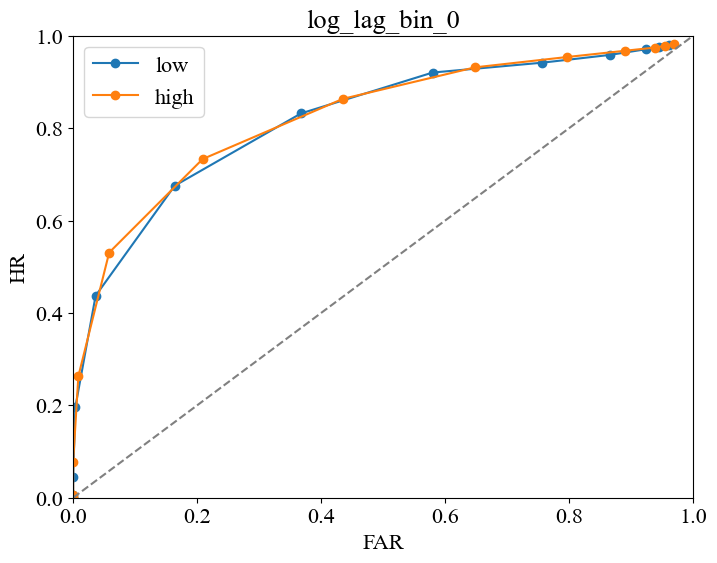

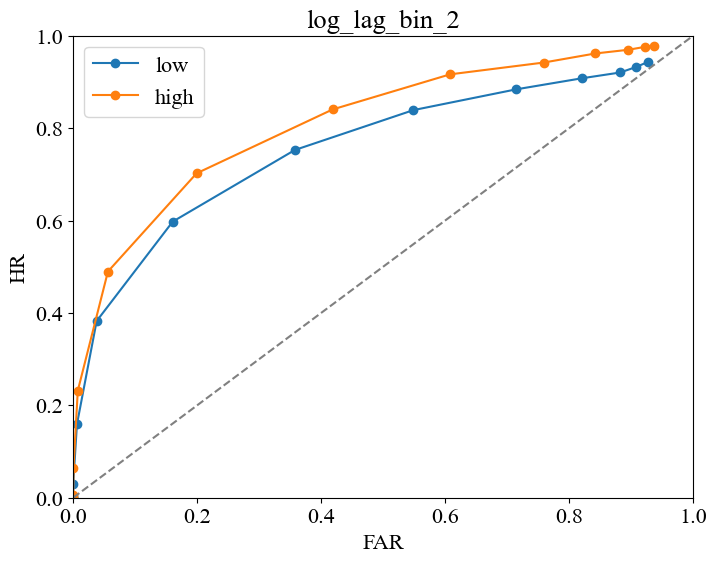

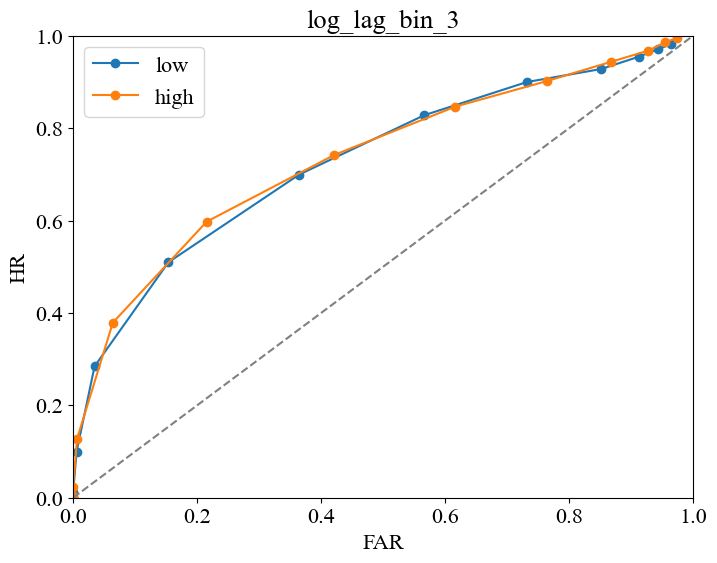

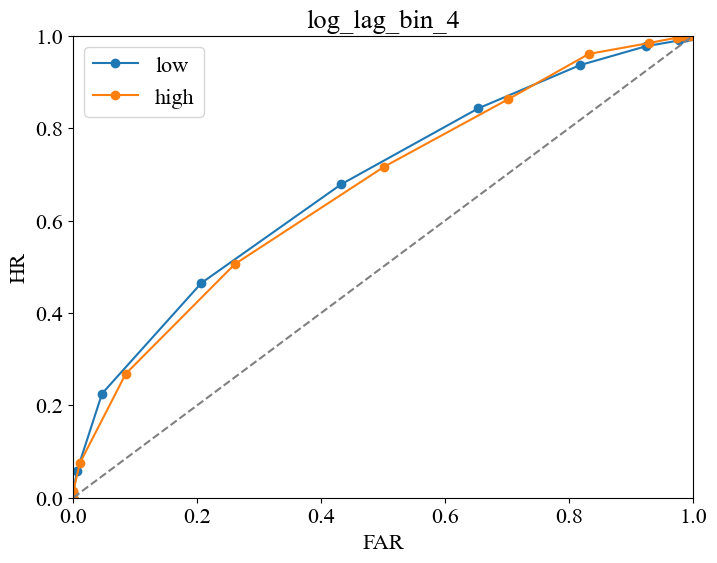

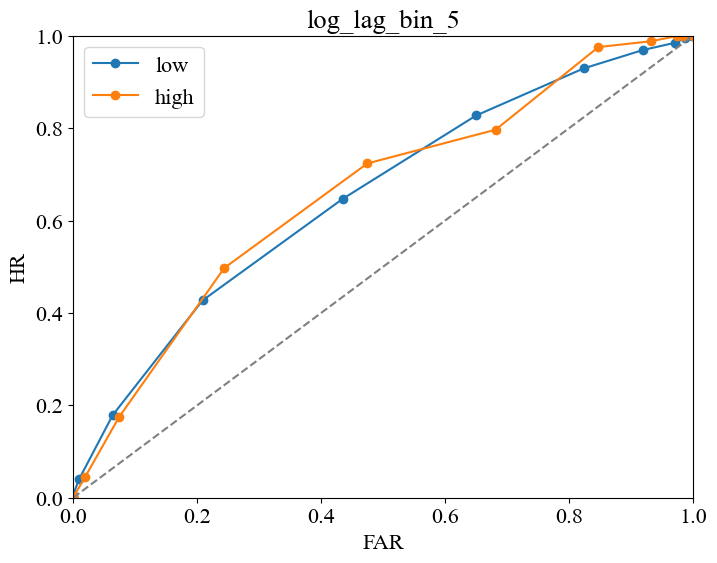

In [32]:
# draw roc curve for log_lag_bin_0 == True and old == True
def get_roc_hrfar(old_csim, new_csim):
    min_thresh = 0.45
    max_thresh = 0.75
    thresholds = np.linspace(min_thresh, max_thresh, 14)  # this affects Az, 7
    hrs = []
    fars = []
    for thresh in thresholds:
        hr = (np.sum(old_csim > thresh) + 0.5) / (len(old_csim) + 1)
        far = (np.sum(new_csim > thresh) + 0.5) / (len(new_csim) + 1)
        hrs.append(hr)
        fars.append(far)
    return hrs, fars


for i in tmp_lst:
    df_csim_log_lag_bin = df_csim.query(f"log_lag_bin_{i} == True")
    old_low_csim = df_csim_log_lag_bin.query("roll_cat_len_level == '0-1' and old == True").csim.to_numpy()
    new_low_csim = df_csim_log_lag_bin.query("roll_cat_len_level == '0-1' and old == False").csim.to_numpy()
    old_high_csim = df_csim_log_lag_bin.query("roll_cat_len_level == '>=2' and old == True").csim.to_numpy()
    new_high_csim = df_csim_log_lag_bin.query("roll_cat_len_level == '>=2' and old == False").csim.to_numpy()

    hrs_low, fars_low = get_roc_hrfar(old_low_csim, new_low_csim)
    hrs_high, fars_high = get_roc_hrfar(old_high_csim, new_high_csim)

    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    plt.plot(fars_low, hrs_low, "-o", label="low")
    plt.plot(fars_high, hrs_high, "-o", label="high")
    plt.plot([0, 1], [0, 1], "--", color="gray")
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel("FAR")
    plt.ylabel("HR")
    plt.legend()
    plt.title(f"log_lag_bin_{i}")